In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


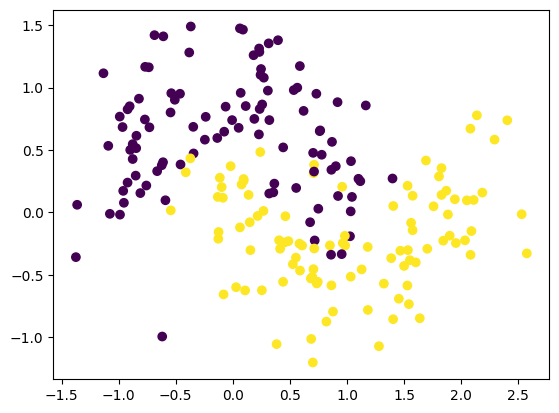

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise= 0.3, random_state=7)
plt.scatter(X[:,0], X[:,1], c= y)
plt.show()

In [4]:
model = Sequential()
model.add(Dense(128, input_dim = 2,activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer = adam, loss = "binary_crossentropy", metrics=["accuracy"])

history = model.fit(X, y , validation_split=0.2, epochs = 2000, verbose = 0)


9600/9600 [==============================] - 22s 2ms/step


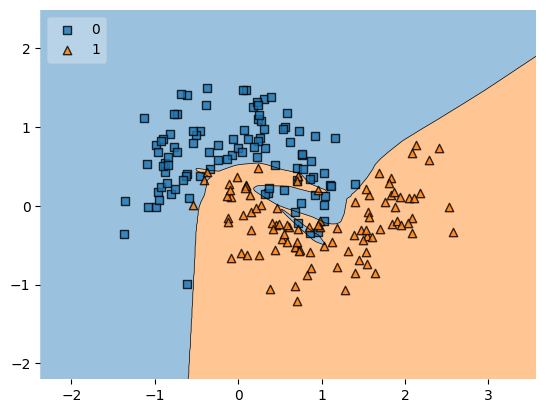

In [7]:
plot_decision_regions(X, y.astype('int'),clf = model, legend = 2)
plt.show()

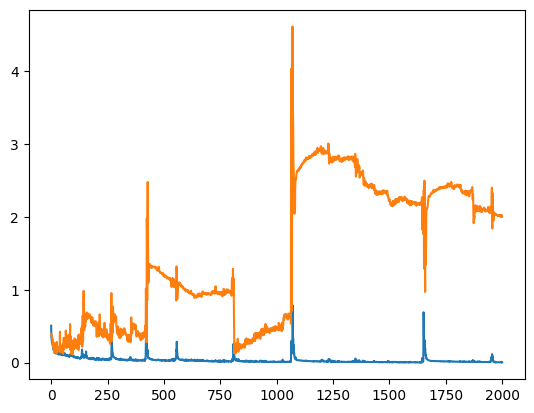

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [11]:
model_regularization = Sequential()
model_regularization.add(Dense(128, input_dim = 2,activation = "relu", kernel_regularizer = tensorflow.keras.regularizers.l2(0.01)))
model_regularization.add(Dense(128, activation = "relu",  kernel_regularizer = tensorflow.keras.regularizers.l2(0.01)))
model_regularization.add(Dense(1,activation="sigmoid"))

model_regularization.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [12]:
adam = Adam(learning_rate=0.01)
model_regularization.compile(optimizer = adam, loss = "binary_crossentropy", metrics=["accuracy"])

history = model_regularization.fit(X, y , validation_split=0.2, epochs = 2000, verbose = 0)

9600/9600 [==============================] - 13s 1ms/step


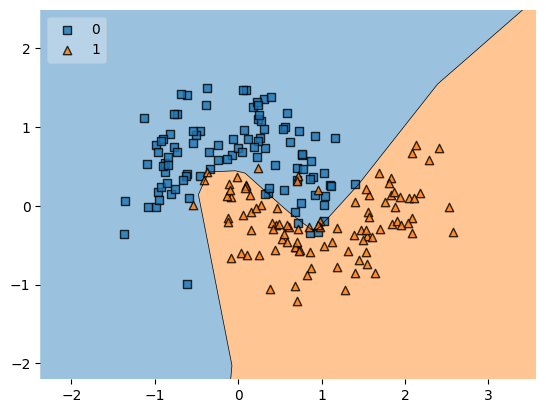

In [13]:
plot_decision_regions(X, y.astype('int'),clf = model_regularization, legend = 2)
plt.show()

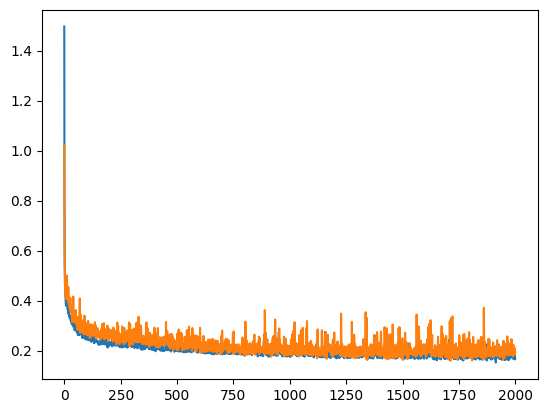

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])